# Chicago Crime Data Analysis

# Project Group: 
* Christopher Habib 
* Siddharth Krishnan
* Ali Kashani 
* Elmaddin Karimov

# Curated datasets:

https://dev.socrata.com/foundry/data.cityofchicago.org/6zsd-86xi

https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

In [1]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('resources/Crimes_-_2001_to_present.csv')
census = pd.read_csv('resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')

### View subset of data

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4381932,HL677807,10/16/2005 09:30:00 PM,051XX S MENARD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,23.0,56.0,14,1138567.0,1869950.0,2005,02/28/2018 03:56:25 PM,41.799263,-87.767377,"(41.799263181, -87.767376862)"
1,6833055,HR241329,03/28/2009 11:30:00 PM,034XX W PARKER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,35.0,22.0,08B,1152927.0,1918074.0,2009,02/28/2018 03:56:25 PM,41.931049,-87.713440,"(41.931049328, -87.713440154)"
2,6833057,HR215483,03/14/2009 01:20:00 PM,072XX S HERMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,17.0,67.0,08B,1165933.0,1856730.0,2009,02/28/2018 03:56:25 PM,41.762448,-87.667394,"(41.762447541, -87.667393762)"
3,6833058,HR241426,03/28/2009 11:00:00 PM,036XX N RAVENSWOOD AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,47.0,6.0,06,1163715.0,1924205.0,2009,02/28/2018 03:56:25 PM,41.947652,-87.673623,"(41.947652256, -87.673622996)"
4,6833059,HR241429,03/28/2009 03:00:00 AM,012XX W LOYOLA AVE,0890,THEFT,FROM BUILDING,COLLEGE/UNIVERSITY RESIDENCE HALL,False,False,...,40.0,1.0,06,1166780.0,1943821.0,2009,02/28/2018 03:56:25 PM,42.001414,-87.661792,"(42.001413896, -87.661791623)"


In [4]:
census.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
 census.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

## What crimes are most prevalent in Chicago?

In [6]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [7]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                1435101
BATTERY                              1244650
CRIMINAL DAMAGE                       778188
NARCOTICS                             714802
ASSAULT                               423683
OTHER OFFENSE                         423342
BURGLARY                              390914
MOTOR VEHICLE THEFT                   316892
DECEPTIVE PRACTICE                    268020
ROBBERY                               258012
CRIMINAL TRESPASS                     195178
WEAPONS VIOLATION                      72138
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48148
OFFENSE INVOLVING CHILDREN             46018
CRIM SEXUAL ASSAULT                    27660
SEX OFFENSE                            25445
INTERFERENCE WITH PUBLIC OFFICER       15485
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14109
ARSON                                  11250
HOMICIDE                                9553
KIDNAPPING

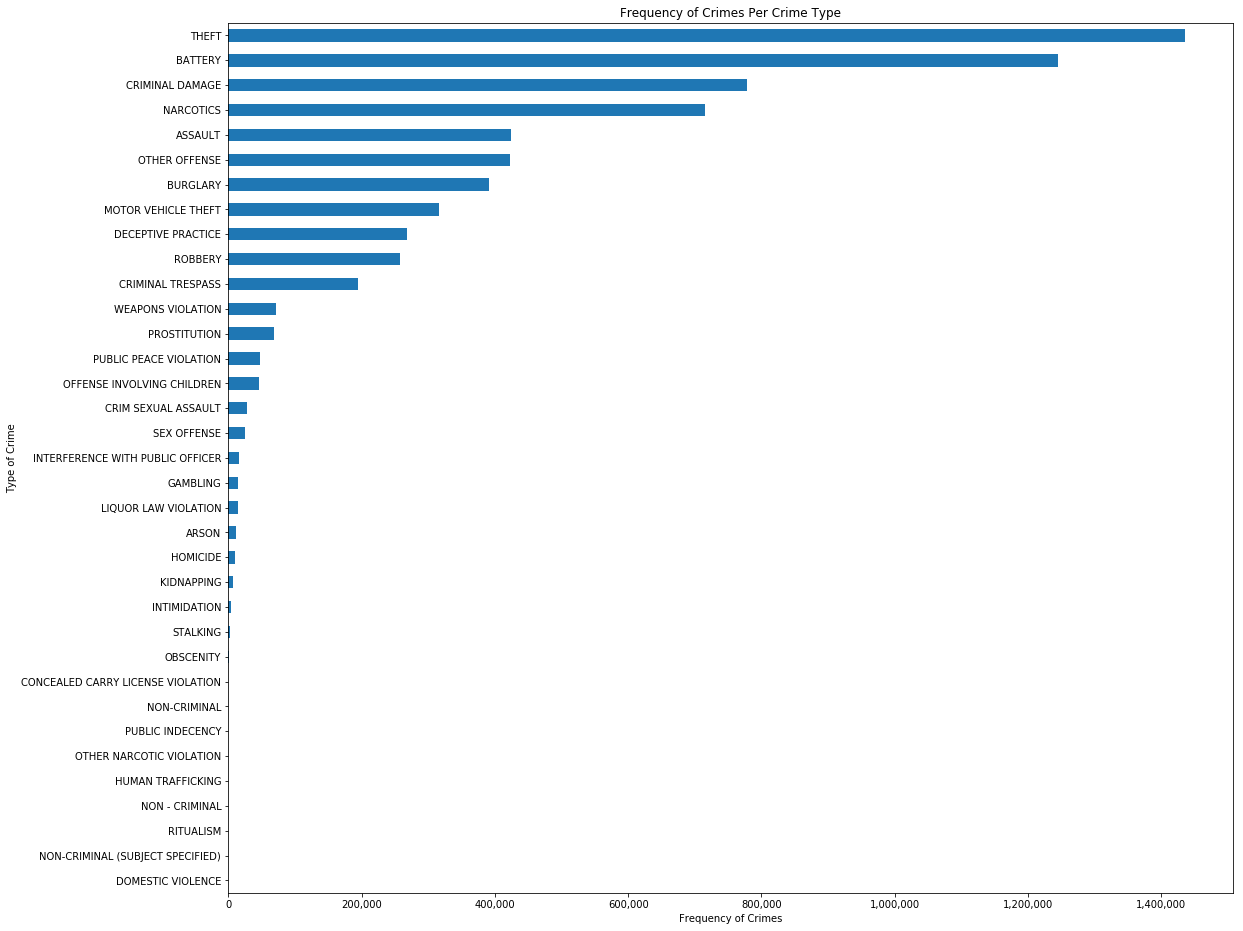

In [8]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/TypeOFCrime.png")


## What year had the most crime?

In [9]:
## Check if any rows are missing data and are null
df['Year'].isnull().values.any()

False

In [10]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2002    486754
2001    485752
2003    475940
2004    469383
2005    453715
2006    448108
2007    437011
2008    427056
2009    392678
2010    370309
2011    351774
2012    335960
2013    307089
2014    275266
2016    268954
2017    268015
2018    265859
2015    264048
2019     33497
Name: Year, dtype: int64

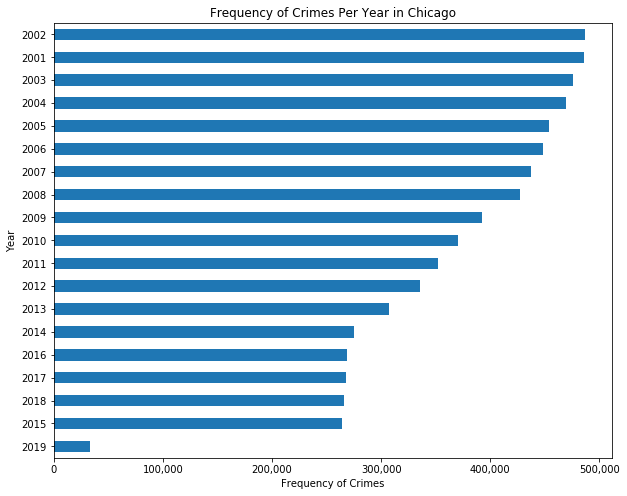

In [11]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerYear.png")

## What percentage of arrests were successful?

In [12]:
## Check if any rows are missing data and are null
df['Arrest'].isnull().values.any()

False

In [13]:
## Count number of successful arrests for each year
df['Arrest'].value_counts()

False    4930863
True     1886305
Name: Arrest, dtype: int64

In [14]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

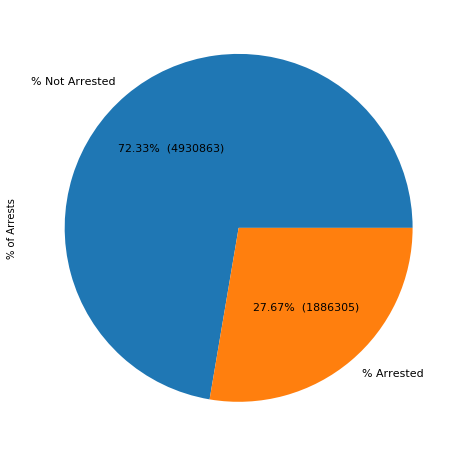

In [15]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))
plt.savefig("output_data/PercentageOfArrests.png")


## What are the successful arrest percentages per year?

In [16]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343850,70.787151
2001,True,141902,29.212849
2002,False,345201,70.918986
2002,True,141553,29.081014
2003,False,334368,70.254234
2003,True,141572,29.745766
2004,False,324697,69.175279
2004,True,144686,30.824721
2005,False,312820,68.946365


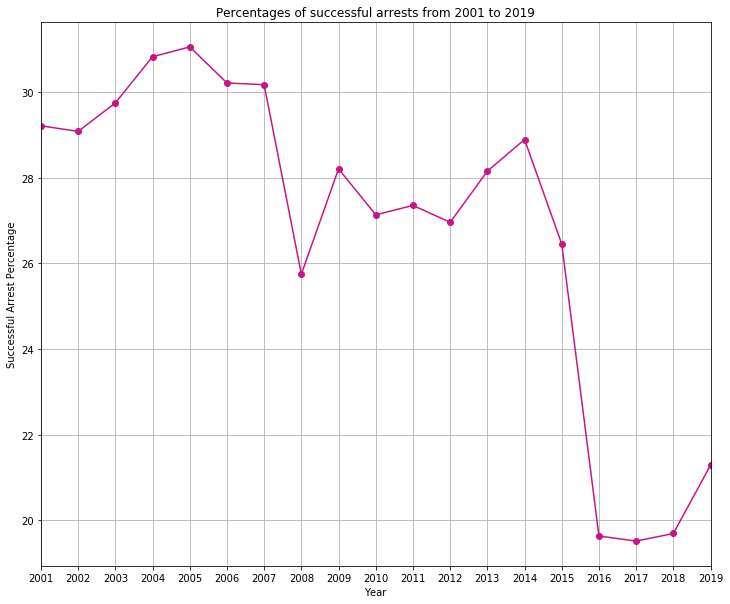

In [17]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2019')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.savefig("output_data/SuccessfulArrest.png")


## Data visualization for crimes based on district from 2001 to present

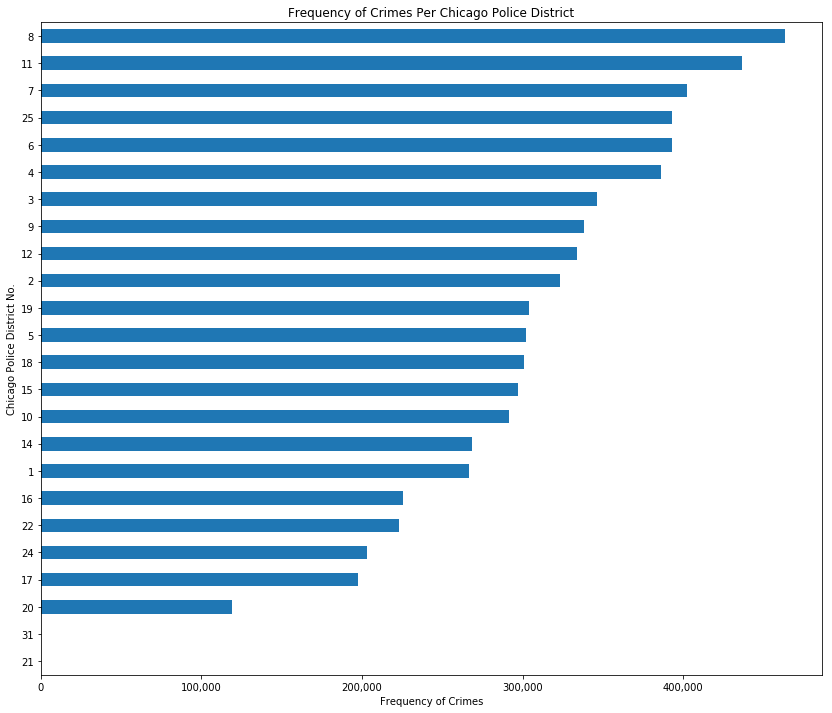

In [18]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerPolisDist.png")


In [19]:
df['Primary Type'] = df['Primary Type'].replace(
    {'MOTOR VEHICLE THEFT': 'THEFT', 'ROBBERY': 'THEFT'})
df["Primary Type"].value_counts()

THEFT                                2010005
BATTERY                              1244650
CRIMINAL DAMAGE                       778188
NARCOTICS                             714802
ASSAULT                               423683
OTHER OFFENSE                         423342
BURGLARY                              390914
DECEPTIVE PRACTICE                    268020
CRIMINAL TRESPASS                     195178
WEAPONS VIOLATION                      72138
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48148
OFFENSE INVOLVING CHILDREN             46018
CRIM SEXUAL ASSAULT                    27660
SEX OFFENSE                            25445
INTERFERENCE WITH PUBLIC OFFICER       15485
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14109
ARSON                                  11250
HOMICIDE                                9553
KIDNAPPING                              6706
INTIMIDATION                            3989
STALKING  

In [20]:
census = census.rename(columns={"Community Area Number":"Community Area"})
census.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [21]:
crime08 = df.loc[df["Year"]==2008]

In [22]:
crime09 = df.loc[df["Year"]==2009]


In [23]:
crime10 = df.loc[df["Year"]==2010]


In [24]:
crime11 = df.loc[df["Year"]==2011]


In [25]:
crime12 = df.loc[df["Year"]==2012]


In [26]:
crime_data=pd.merge(crime08,census,on="Community Area")
crime_data1=pd.merge(crime09,census,on="Community Area")
crime_data2=pd.merge(crime10,census,on="Community Area")
crime_data3=pd.merge(crime11,census,on="Community Area")
crime_data4=pd.merge(crime12,census,on="Community Area")

In [27]:
crime2=pd.concat([crime_data, crime_data1,crime_data2,crime_data3,crime_data4])
crime2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [28]:
theft=crime2.loc[crime2["Primary Type"]=="THEFT"]
theft

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,6833176,HP731989,12/13/2008 01:30:00 PM,022XX W LAWRENCE AVE,0810,THEFT,OVER $500,STREET,False,False,...,-87.684872,"(41.968671122, -87.684871598)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
2,6851983,HR258044,11/01/2008 08:00:00 AM,054XX N CAMPBELL AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,-87.691758,"(41.980090021, -87.691758346)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
3,6865551,HR270948,05/15/2008 08:00:00 AM,025XX W GUNNISON ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,-87.692709,"(41.969678337, -87.692708598)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5,6899379,HR305897,09/01/2008 10:00:00 AM,051XX N CALIFORNIA AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,HOSPITAL BUILDING/GROUNDS,False,False,...,-87.698898,"(41.975151721, -87.698898226)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
6,6071217,HP170745,02/08/2008 06:00:00 PM,053XX N BELL AVE,0810,THEFT,OVER $500,STREET,False,False,...,-87.685585,"(41.978150877, -87.685584529)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
15,6411847,HP496117,08/05/2008 07:30:00 AM,018XX W LAWRENCE AVE,0820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,-87.674703,"(41.968816304, -87.674702715)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
25,6584745,HP655750,10/23/2008 11:20:00 AM,051XX N DAMEN AVE,0820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, BUILDING",False,False,...,-87.679375,"(41.975099794, -87.679374655)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
26,6628041,HP699814,11/23/2008 07:00:00 PM,055XX N WESTERN AVE,0810,THEFT,OVER $500,STREET,False,False,...,-87.689386,"(41.981915352, -87.689386142)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
27,6652596,HP724814,12/09/2008 11:30:00 AM,055XX N CAMPBELL AVE,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,-87.691825,"(41.981904308, -87.691824725)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
28,6705301,HR119992,12/18/2008 01:18:00 PM,048XX N DAMEN AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,...,-87.679202,"(41.969341473, -87.679201891)",Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0


In [29]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].max()

54.8

In [30]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].min()

2.5

In [31]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%"]

theft["High School Graduate Percentage"] = pd.cut(theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"], bins, labels=group_names)
a=theft["High School Graduate Percentage"].value_counts()/1000

a1=pd.DataFrame(a.sort_index())
a1

C:\Users\Nasir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,High School Graduate Percentage
0-5%,99.358
5-10%,33.626
10-15%,118.199
15-20%,83.236
20-25%,78.196
25-30%,51.724
30-35%,30.704
35-40%,29.352
40-45%,17.390
45-50%,5.033


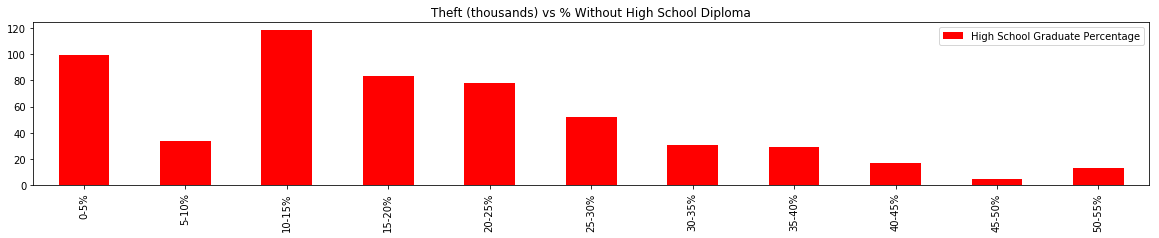

In [53]:
a1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs % Without High School Diploma")
plt.savefig("output_data/Theft_Without_High_School_Diploma.png")

plt.show()

In [33]:
theft["PERCENT AGED 16+ UNEMPLOYED"].max()

35.9

In [34]:
theft["PERCENT AGED 16+ UNEMPLOYED"].min()

4.7

In [35]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%"]

theft["Unemployment %"] = pd.cut(theft["PERCENT AGED 16+ UNEMPLOYED"], bins, labels=group_names)
b=theft["Unemployment %"].value_counts()/1000

b1=pd.DataFrame(b.sort_index())
b1

C:\Users\Nasir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unemployment %
0-5%,22.524
5-10%,194.910
10-15%,74.250
15-20%,106.816
20-25%,108.321
25-30%,37.502
30-35%,3.173
35-40%,12.963


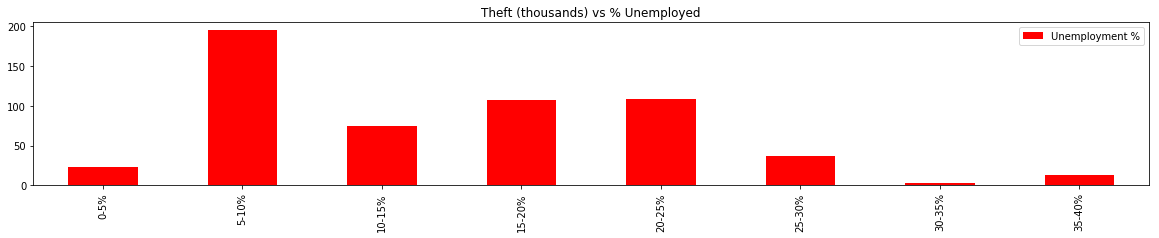

In [54]:
b1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs % Unemployed")
plt.savefig("output_data/Theft_vs_Unemployed.png")
plt.show()

In [37]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].max()

56.5

In [38]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].min()

3.3

In [39]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55,60]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%"]

theft["% Houses Under Poverty"] = pd.cut(theft["PERCENT HOUSEHOLDS BELOW POVERTY"], bins, labels=group_names)
c=theft["% Houses Under Poverty"].value_counts()
c_df = pd.DataFrame(c)

c_df["relative"]=c_df["% Houses Under Poverty"]/1000
c1=pd.DataFrame(c_df["relative"].sort_index())
c1

C:\Users\Nasir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,relative
0-5%,1.667
5-10%,18.324
10-15%,159.886
15-20%,96.147
20-25%,57.111
25-30%,120.416
30-35%,57.452
35-40%,1.075
40-45%,33.246
45-50%,11.962


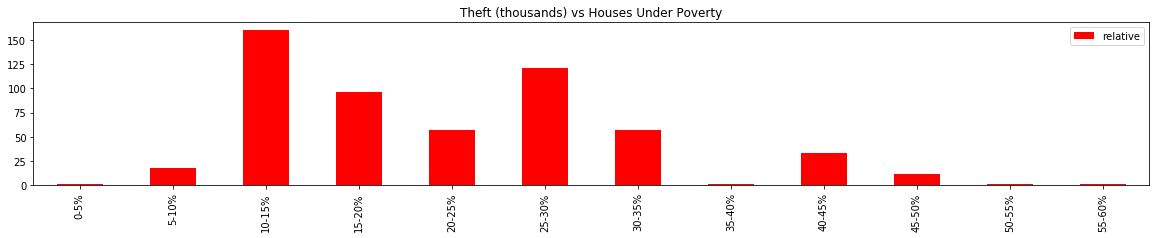

In [55]:
c1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs Houses Under Poverty")
plt.savefig("output_data/Theft_vs_Houses_Under_Poverty.png")
plt.show()

In [41]:
theft["PERCENT OF HOUSING CROWDED"].max()

15.8

In [42]:
theft["PERCENT OF HOUSING CROWDED"].min()

0.3

In [43]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 4,8,12,16]

# Create the names for the four bins
group_names = ["0-4%", "4-8%", "8-12%", "12-16%", ]

theft["% Crowded Housing"] = pd.cut(theft["PERCENT OF HOUSING CROWDED"], bins, labels=group_names)
d=theft["% Crowded Housing"].value_counts()/1000

d1 = pd.DataFrame(d)
d1


C:\Users\Nasir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,% Crowded Housing
0-4%,332.288
4-8%,144.309
8-12%,51.899
12-16%,31.963


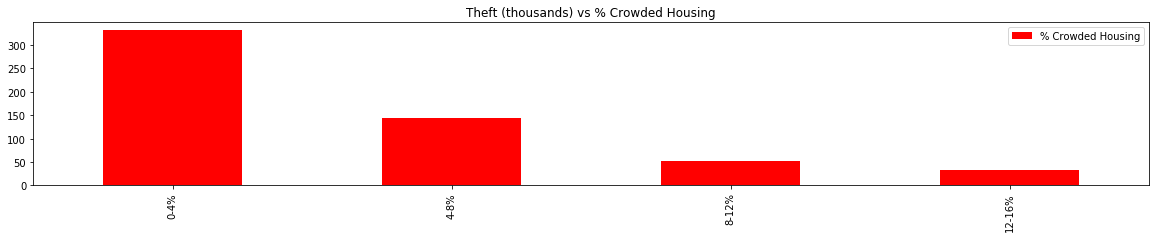

In [56]:
d1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs % Crowded Housing")
plt.savefig("output_data/Theft_vs_%Crowded_Housing.png")
plt.show()

In [45]:
theft["PER CAPITA INCOME "].max()

88669

In [46]:
theft["PER CAPITA INCOME "].min()

8201

In [47]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10000,20000,30000,40000,50000,60000,70000,80000,90000]

# Create the names for the four bins
group_names = ["0-10,000", "10,000-20,000", "20,000-30,000", "30,000-40,000","40,000-50,000","50,000-60,000","60,000-70,000","70,000-80,000","80,000-90,000" ]

theft["Per Capita Income Bracket"] = pd.cut(theft["PER CAPITA INCOME "], bins, labels=group_names)
e=theft["Per Capita Income Bracket"].value_counts()/1000
e1=pd.DataFrame(e.sort_index())
e1

C:\Users\Nasir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Per Capita Income Bracket
"0-10,000",1.273
"10,000-20,000",273.766
"20,000-30,000",94.125
"30,000-40,000",49.528
"40,000-50,000",47.298
"50,000-60,000",8.993
"60,000-70,000",40.758
"70,000-80,000",15.522
"80,000-90,000",29.196


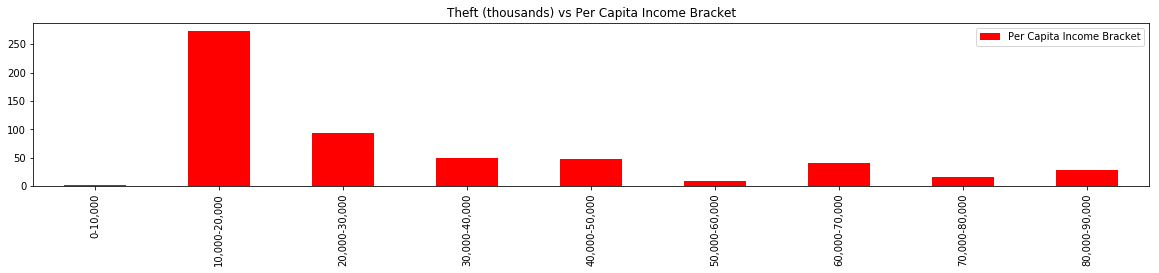

In [57]:
e1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs Per Capita Income Bracket")
plt.savefig("output_data/Theft_vs_Per_Capita_Income_Bracket.png")
plt.show()

In [49]:
theft['HARDSHIP INDEX'].max()

98.0

In [50]:
theft['HARDSHIP INDEX'].min()

1.0

In [51]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10,20,30,40,50,60,70,80,90,100]

# Create the names for the four bins
group_names = ["0-10", "10-20", "20-30", "30-40","40-50","50-60","60-70","70-80","80-90","90-100" ]

crime2["Hardship Bracket"] = pd.cut(crime2['HARDSHIP INDEX'], bins, labels=group_names)
f=crime2["Hardship Bracket"].value_counts()/1000
f1=pd.DataFrame(f.sort_index())
f1

,Hardship Bracket
0-10,247.906
10-20,132.678
20-30,111.649
30-40,123.577
40-50,111.349
50-60,250.097
60-70,160.882
70-80,299.700
80-90,250.560
90-100,188.494


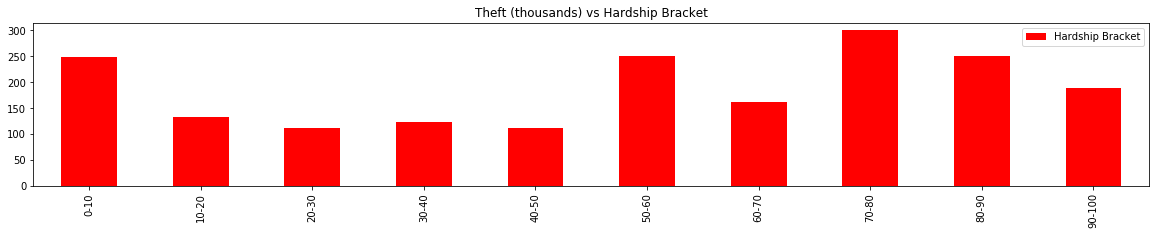

In [58]:
f1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs Hardship Bracket")
plt.savefig("output_data/Theft_vs_Hardship_Bracket.png")
plt.show()

In [37]:
grouped = merged_pd.groupby("Community Area")
grouped.count()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Community Area,,,,,,,,,,,,,,,,,,,,,
1.0,95048,95048,95048,95048,95048,95048,95048,94978,95048,95048,...,94179,94179,95048,95048,95048,95048,95048,95048,95048,95048
2.0,77413,77413,77413,77413,77413,77413,77413,77359,77413,77413,...,76816,76816,77413,77413,77413,77413,77413,77413,77413,77413
3.0,90819,90819,90819,90819,90819,90819,90819,90674,90819,90819,...,90020,90020,90819,90819,90819,90819,90819,90819,90819,90819
4.0,43449,43449,43449,43449,43449,43449,43449,43376,43449,43449,...,43134,43134,43449,43449,43449,43449,43449,43449,43449,43449
5.0,37226,37226,37226,37226,37226,37226,37226,37143,37226,37226,...,36920,36920,37226,37226,37226,37226,37226,37226,37226,37226
6.0,122877,122877,122877,122877,122877,122877,122877,122586,122877,122877,...,121698,121698,122877,122877,122877,122877,122877,122877,122877,122877
7.0,97233,97233,97233,97233,97233,97233,97233,97024,97233,97233,...,96378,96378,97233,97233,97233,97233,97233,97233,97233,97233
8.0,212358,212358,212358,212358,212358,212358,212358,212026,212358,212358,...,210138,210138,212358,212358,212358,212358,212358,212358,212358,212358
9.0,5995,5995,5995,5995,5995,5995,5995,5985,5995,5995,...,5926,5926,5995,5995,5995,5995,5995,5995,5995,5995
